In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Sample of iris dataset
setosa = np.array([5.1, 4.9, 4.7, 4.6, 5, 5.4, 4.6, 5, 4.4, 4.9])
versicolor = np.array([7, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2])
virginica = np.array([6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2])

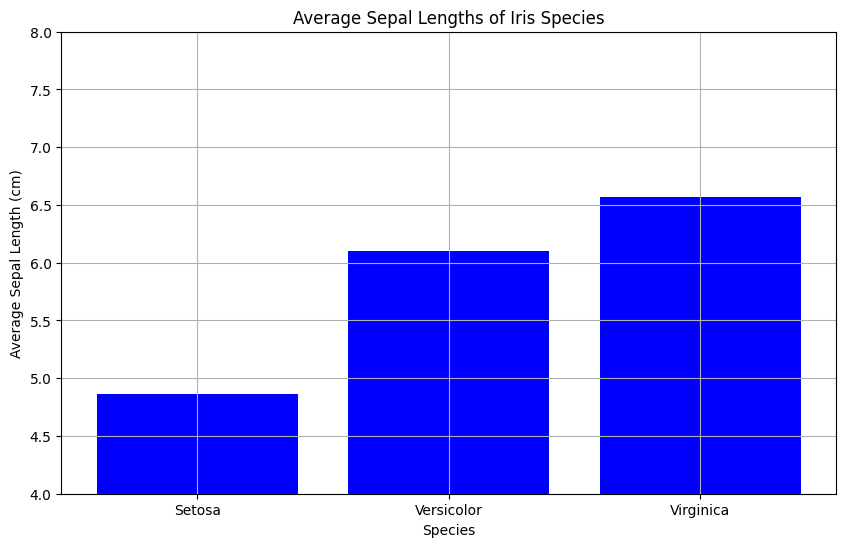

In [17]:
# Calculate the averages
averages = {
    'Setosa': np.mean(setosa),
    'Versicolor': np.mean(versicolor),
    'Virginica': np.mean(virginica)
}

# Prepare data for plotting 
# Organize the species names and their corresponding average sepal lengths into lists for plotting.
species = list(averages.keys())
average_values = list(averages.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(species, average_values, color='b')

# Adding titles and labels
plt.title('Average Sepal Lengths of Iris Species')
plt.xlabel('Species')
plt.ylabel('Average Sepal Length (cm)')
plt.ylim(4, 8)  # Set y-axis limits for better visualization

# Show the plot
plt.grid(True)
plt.show()

In [4]:
help(stats.f_oneway)

Help on function f_oneway in module scipy.stats._stats_py:

f_oneway(*samples, axis=0, nan_policy='propagate', keepdims=False)
    Perform one-way ANOVA.

    The one-way ANOVA tests the null hypothesis that two or more groups have
    the same population mean.  The test is applied to samples from two or
    more groups, possibly with differing sizes.

    Parameters
    ----------
    sample1, sample2, ... : array_like
        The sample measurements for each group.  There must be at least
        two arguments.  If the arrays are multidimensional, then all the
        dimensions of the array must be the same except for `axis`.
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
    nan_policy : {'propagate', 'omit', 'rai

In [5]:
# Perform ANOVA
f_statistic, p_value = stats.f_oneway(setosa, versicolor, virginica)

print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

F-Statistic: 18.573556632877924
P-Value: 8.443446092255683e-06


In [6]:
import numpy as np

# sample of iris dataset
setosa = np.array([5.1, 4.9, 4.7, 4.6, 5, 5.4, 4.6, 5, 4.4, 4.9])
versicolor = np.array([7, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2])
virginica = np.array([6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2])

# Combine all data into a single array
all_data = np.concatenate([setosa, versicolor, virginica])
print(all_data)

# Calculate group means
mean_setosa = np.mean(setosa)
mean_versicolor = np.mean(versicolor)
mean_virginica = np.mean(virginica)

# Calculate overall mean
overall_mean = np.mean(all_data)

# Number of observations per group
n_setosa = len(setosa)
n_versicolor = len(versicolor)
n_virginica = len(virginica)

# Calculate SSB (Between-group sum of squares)
SSB = (n_setosa * (mean_setosa - overall_mean) ** 2 +
       n_versicolor * (mean_versicolor - overall_mean) ** 2 +
       n_virginica * (mean_virginica - overall_mean) ** 2)

# Calculate SSW (Within-group sum of squares)
SSW = (np.sum((setosa - mean_setosa) ** 2) +
       np.sum((versicolor - mean_versicolor) ** 2) +
       np.sum((virginica - mean_virginica) ** 2))

# Calculate SST (Total sum of squares)
SST = np.sum((all_data - overall_mean) ** 2)

# Calculate degrees of freedom
df_between = 2  # k - 1, where k is the number of groups
df_within = len(all_data) - 3  # n - k, where n is the total number of observations

# Calculate mean squares
MSB = SSB / df_between
MSW = SSW / df_within

# Calculate F-statistic
F = MSB / MSW

# Print results
print(f"Mean Setosa: {mean_setosa}")
print(f"Mean Versicolor: {mean_versicolor}")
print(f"Mean Virginica: {mean_virginica}")
print(f"Overall Mean: {overall_mean}")
print(f"SSB (Between-group sum of squares): {SSB}")
print(f"SSW (Within-group sum of squares): {SSW}")
print(f"SST (Total sum of squares): {SST}")
print(f"df_between: {df_between}")
print(f"df_within: {df_within}")
print(f"MSB (Mean square between groups): {MSB}")
print(f"MSW (Mean square within groups): {MSW}")
print(f"F-statistic: {F}")
print(f"P-Value: {p_value}")

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 7.  6.4 6.9 5.5 6.5 5.7 6.3 4.9
 6.6 5.2 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3 6.7 7.2]
Mean Setosa: 4.859999999999999
Mean Versicolor: 6.1000000000000005
Mean Virginica: 6.57
Overall Mean: 5.843333333333333
SSB (Between-group sum of squares): 15.608666666666686
SSW (Within-group sum of squares): 11.344999999999997
SST (Total sum of squares): 26.953666666666663
df_between: 2
df_within: 27
MSB (Mean square between groups): 7.804333333333343
MSW (Mean square within groups): 0.42018518518518505
F-statistic: 18.57355663287795
P-Value: 8.443446092255683e-06


Interpretation: As the p-value is less than the significance level (typically 0.05), we reject the null hypothesis.
Conclusion: The ANOVA test shows that the mean sepal lengths for at least one of the species are significantly different from the others, meaning that not all group means are equal. This suggests a statistically significant difference in the average sepal lengths among the species.

Practical Implications:
Biological Significance: Different species of iris flowers have different average sepal lengths. This might be related to their evolutionary adaptations, ecological niches, or other biological factors.
Classification: Knowing that sepal lengths differ significantly among species can help in classifying and identifying species based on their sepal measurements.
By identifying and confirming these differences, researchers and scientists can better understand the characteristics and variations within and between species.
